# **Data Preperation**
Converts mrc files to numpy h5 file for easy loading into CNN

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Install mrcfile package
!pip install mrcfile

     |████████████████████████████████| 40 kB 19 kB/s 


In [4]:
import numpy as np
import pandas as pd
import mrcfile
import os
from matplotlib import pyplot as plt
import h5py
from tqdm import tqdm

In [6]:
# Dataset 1
data_path = '/content/drive/MyDrive/UpWork/ChepVAE/DataRaw/'
hdf5_path = '/content/drive/MyDrive/UpWork/ChepVAE/Data/hdf5/'
output_path = '/content/drive/MyDrive/UpWork/ChepVAE/Data/datasplit.csv'

# No Preprocessing use it as is
def preprocess(x):
  return x

In [8]:
# Dataset 2
data_path = '/content/drive/MyDrive/UpWork/ChepVAE/10230/Micrographs/'
hdf5_path = '/content/drive/MyDrive/UpWork/ChepVAE/10230/hdf5/'
output_path = '/content/drive/MyDrive/UpWork/ChepVAE/10230/datasplit.csv'

# Scale the pixles down to 0 to 1 range by diving it by 255
def preprocess(x):
  return x / 255.0

Data Type:  float32
Shape:  (611, 270, 270)
Min: 35.864258 Max: 53.997334


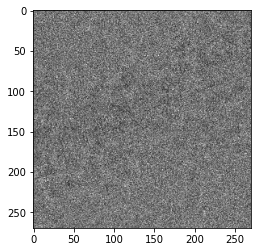

In [17]:
# For inspection purpose, randomly open a file, check its shpae and content
filename = np.random.choice(os.listdir(data_path))
full_path = os.path.join(data_path, filename)
mrc = mrcfile.open(full_path, mode='r')
print("Data Type: ", mrc.data.dtype)
print("Shape: ", mrc.data.shape)
print("Min:", mrc.data.min(), "Max:", mrc.data.max())
plt.imshow(mrc.data[np.random.choice(len(mrc.data))], cmap='gray')
mrc.close()

In [9]:
# The big run, may take minues to finish
os.makedirs(hdf5_path, exist_ok=True)
pbar = tqdm(sorted(os.listdir(data_path)))
for filename in pbar:
  pbar.set_description("Processing: {}".format(filename))
  basename, ext = os.path.splitext(filename)
  hdf5_path_full = os.path.join(hdf5_path, basename + '.h5')
  full_path = os.path.join(data_path, filename)
  with mrcfile.open(full_path, mode='r') as mrc:
    with h5py.File(hdf5_path_full, 'w') as hf:
      hf.create_dataset('data', data=preprocess(mrc.data))

Processing: FoilHole_14819468_Data_14817538_14817539_20170416_1146-3186_cor2_DW.mrcs: 100%|██████████| 296/296 [16:33<00:00,  3.36s/it]


In [19]:
# Create datasplit, Seed is set to zero for reproducibility
# To get diffrent split change the random seed
np.random.seed(0)
datasplit = pd.DataFrame()
datasplit['Filename'] = sorted(os.listdir(hdf5_path))
datasplit['Split'] = np.random.choice(['Train', 'Val'], size=len(datasplit), replace=True, p=[0.8, 0.2])
datasplit.to_csv(output_path, index=False)
datasplit['Split'].value_counts()

Train    240
Val       56
Name: Split, dtype: int64